In [20]:
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn

import matplotlib.pyplot as plt

# Convolution

In [2]:
layer = nn.Conv2D(channels=1,kernel_size =(3,3),in_channels=1,strides=(1,1),padding=(0,0),activation='relu',prefix='conv_') 
layer

Conv2D(1 -> 1, kernel_size=(3, 3), stride=(1, 1), Activation(relu))

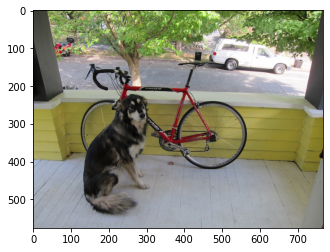

In [7]:
o = plt.imshow(plt.imread('../dog.jpg'))

In [8]:
layer.initialize(mx.init.Constant([[-1,0,1], # Sobel operator
                                  [-2,0,2], # Detect Vertical lines
                                  [-1,0,1]]))

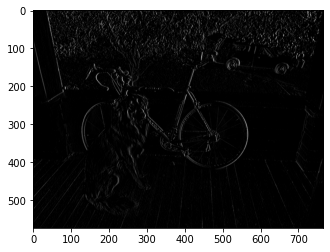

In [9]:
image = mx.image.imread('../dog.jpg',0).astype('float32')
image_channel_first = image.transpose((2,0,1))
image_batchfied = image_channel_first.expand_dims(axis=0)
output = layer(image_batchfied)
o = plt.imshow(output.squeeze().asnumpy(),cmap='gray')

In [10]:
# Parameters

layer.collect_params()

conv_ (
  Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter conv_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [11]:
layer.collect_params()['conv_weight']

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [12]:
layer.weight

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [13]:
layer.weight.data()


[[[[-1.  0.  1.]
   [-2.  0.  2.]
   [-1.  0.  1.]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [14]:
layer.bias.data()


[0.]
<NDArray 1 @cpu(0)>

# Max Pooling

In [15]:
layer = nn.MaxPool2D(pool_size=(4,4))
layer

MaxPool2D(size=(4, 4), stride=(4, 4), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)

In [16]:
pooled = layer(output)

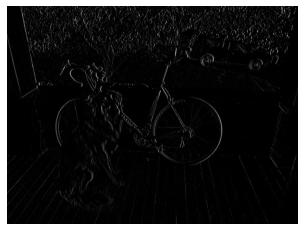

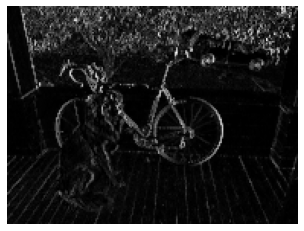

In [18]:
plt.imshow(output.squeeze().asnumpy(),cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(pooled.squeeze().asnumpy(),cmap='gray')
o=plt.axis('off')

In [19]:
layer.collect_params()

pool0_ (

)

# Dense Layer

In [21]:
layer = nn.Dense(units=10,in_units=3,activation='relu')
layer

Dense(3 -> 10, Activation(relu))

In [22]:
layer.initialize(mx.init.One())

In [24]:
inputs = mx.nd.ones((1,3))
inputs,layer(inputs)

(
 [[1. 1. 1.]]
 <NDArray 1x3 @cpu(0)>,
 
 [[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]
 <NDArray 1x10 @cpu(0)>)

In [25]:
layer.weight.data()


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
<NDArray 10x3 @cpu(0)>

In [26]:
layer.bias.data()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<NDArray 10 @cpu(0)>

# Exit